In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

In [2]:
df = pd.read_csv('ice_cream.csv')
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [3]:
df.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [4]:
df.shape

(49, 2)

In [6]:
X = df[['Temperature (°C)']]
y = df['Ice Cream Sales (units)']

X.shape

(49, 1)

Text(0, 0.5, 'Y dataset')

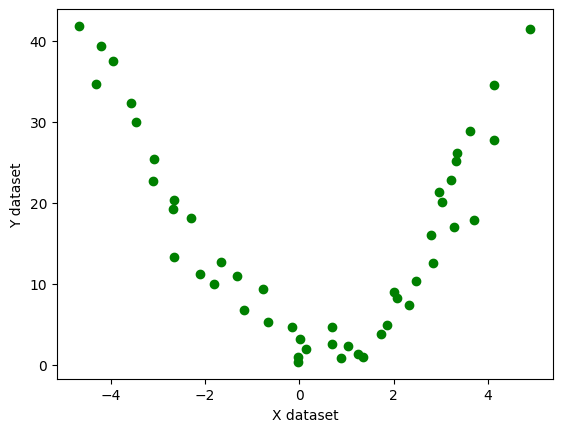

In [7]:
plt.scatter(X, y, color = "g")
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [9]:
X_train

,Temperature (°C)
8,-2.672461
3,-3.949661
6,-3.108440
40,3.211366
41,3.270044
46,4.130868
15,-1.326379
9,-2.652287
16,-1.173123
24,0.688781


In [10]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.99985457],
       [-1.46074708],
       [-1.15718275],
       [ 1.12339254],
       [ 1.14456715],
       [ 1.45520542],
       [-0.51410534],
       [-0.99257454],
       [-0.45880124],
       [ 0.21308844],
       [ 0.71335796],
       [ 0.59243303],
       [-1.71789761],
       [ 1.16834372],
       [ 0.68600818],
       [-1.28249972],
       [ 0.45523803],
       [-0.86121269],
       [ 0.96947437],
       [-1.5931466 ],
       [-0.04769763],
       [-1.55613134],
       [ 0.98640735],
       [ 0.85656422],
       [ 0.01839051],
       [ 1.05465136],
       [-0.9922899 ],
       [-0.03235994],
       [-0.27859763],
       [ 1.73240614],
       [-0.04851362],
       [-1.14739012],
       [ 1.16117705],
       [-0.63462184],
       [ 0.41225903],
       [ 1.03265965]])

In [11]:
regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = regression.predict(X_test)

In [13]:
score = r2_score(y_test, y_pred)

score

-0.2463089202933728

In [14]:
df.corr()

,Temperature (°C),Ice Cream Sales (units)
Temperature (°C),1.000000,-0.175184
Ice Cream Sales (units),-0.175184,1.000000


Text(0, 0.5, 'Y')

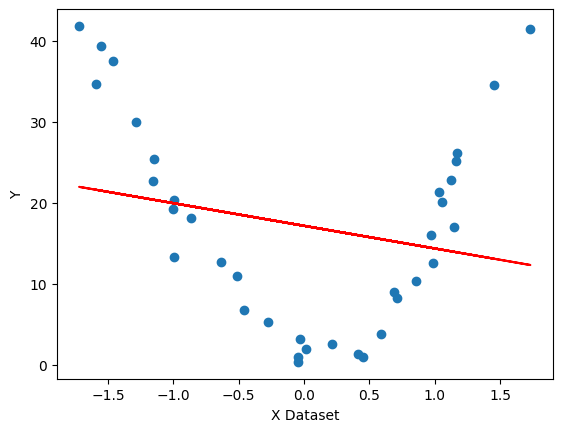

In [15]:
plt.plot(X_train, regression.predict(X_train), color = "r")
plt.scatter(X_train, y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [22]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_poly

array([[ 1.00000000e+00, -9.99854569e-01,  9.99709160e-01],
       [ 1.00000000e+00, -1.46074708e+00,  2.13378202e+00],
       [ 1.00000000e+00, -1.15718275e+00,  1.33907191e+00],
       [ 1.00000000e+00,  1.12339254e+00,  1.26201081e+00],
       [ 1.00000000e+00,  1.14456715e+00,  1.31003396e+00],
       [ 1.00000000e+00,  1.45520542e+00,  2.11762283e+00],
       [ 1.00000000e+00, -5.14105345e-01,  2.64304306e-01],
       [ 1.00000000e+00, -9.92574535e-01,  9.85204208e-01],
       [ 1.00000000e+00, -4.58801245e-01,  2.10498582e-01],
       [ 1.00000000e+00,  2.13088442e-01,  4.54066843e-02],
       [ 1.00000000e+00,  7.13357959e-01,  5.08879578e-01],
       [ 1.00000000e+00,  5.92433032e-01,  3.50976897e-01],
       [ 1.00000000e+00, -1.71789761e+00,  2.95117221e+00],
       [ 1.00000000e+00,  1.16834372e+00,  1.36502706e+00],
       [ 1.00000000e+00,  6.86008178e-01,  4.70607220e-01],
       [ 1.00000000e+00, -1.28249972e+00,  1.64480553e+00],
       [ 1.00000000e+00,  4.55238028e-01

In [23]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)

score = r2_score(y_test, y_pred)
score

0.8697223942969937

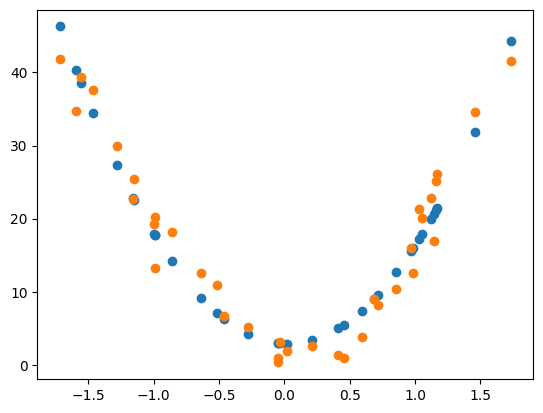

In [24]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)